<h1>1. Kis házi feladat</h1>
<h2>5. Feladat - File beolvasás</h2>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import requests
import re
import pandas as pd

img_src = ['1.png',
           '2.png',
           '3.png',
           '4.png',
           '5.png']

filename_queue = tf.train.string_input_producer(img_src)

reader = tf.WholeFileReader()
key, value = reader.read(filename_queue)


images = tf.image.decode_png(value)

init_op = tf.global_variables_initializer()
sess = tf.InteractiveSession()

with sess.as_default():
    sess.run(init_op)

coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(coord=coord)

<h2>5. Feladat - Kép tömb kiírása</h2>

In [2]:
arro = np.array([],dtype=np.uint8)

for i in range(len(img_src)):
    image = images.eval()
    arro = np.append(arro,np.array(image))
    

arro = arro.reshape(-1,32,32,4)
print(arro)

[[[[  0   0   0   0]
   [  0   0   0   0]
   [  0   0   0   0]
   ..., 
   [  0   0   0   0]
   [  0   0   0   0]
   [  0   0   0   0]]

  [[  0   0   0   0]
   [  0   0   0   0]
   [  0   0   0   0]
   ..., 
   [  0   0   0   0]
   [  0   0   0   0]
   [  0   0   0   0]]

  [[  0   0   0   0]
   [  0   0   0   0]
   [  0   0   0   0]
   ..., 
   [  0   0   0   3]
   [  0   0   0   0]
   [  0   0   0   0]]

  ..., 
  [[  0   0   0   0]
   [  0   0   0   0]
   [  0   0   0   0]
   ..., 
   [  0   0   0  48]
   [  0   0   0   0]
   [  0   0   0   0]]

  [[  0   0   0   0]
   [  0   0   0   0]
   [  0   0   0   0]
   ..., 
   [  0   0   0  48]
   [  0   0   0   0]
   [  0   0   0   0]]

  [[  0   0   0   0]
   [  0   0   0   0]
   [  0   0   0   0]
   ..., 
   [  0   0   0  36]
   [  0   0   0   0]
   [  0   0   0   0]]]


 [[[  0   0   0   0]
   [  0   0   0   0]
   [  0   0   0   0]
   ..., 
   [  0   0   0   0]
   [  0   0   0   0]
   [  0   0   0   0]]

  [[  0   0   0   0]
   [  0   

<h2>5. Feladat - Képek megjelenítése</h2>

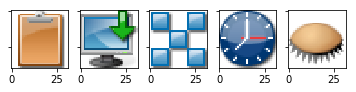

In [3]:
fig = plt.figure()
for i in range(len(img_src)):
    fig.add_subplot(1,len(img_src),i+1).set_yticklabels([])
    plt.imshow(arro[i])
plt.show()

<h2>6. Feladat - Csatornák átlaga, szórása</h2>

In [4]:
arr = arro

red = np.array(arr[::,::,::,0:1],dtype=np.float64) #red
green = np.array(arr[::,::,::,1:2],dtype=np.float64) #green
blue = np.array(arr[::,::,::,2:3],dtype=np.float64) #blue


print("red atlag kepenkent")
print(np.mean(red.reshape(len(img_src),-1),axis=1))
print("\nred atlag osszesen")
print(np.mean(red))
print("\ngreen atlag kepenkent")
print(np.mean(green.reshape(len(img_src),-1),axis=1))
print("\ngreen atlag osszesen")
print(np.mean(green))
print("\nblue atlag kepenkent")
print(np.mean(blue.reshape(len(img_src),-1),axis=1))
print("\nblue atlag osszesen")
print(np.mean(blue))

red atlag kepenkent
[ 142.20117188   78.86816406   41.9921875    57.49902344   90.71875   ]

red atlag osszesen
82.255859375

green atlag kepenkent
[ 103.44433594  111.95410156   76.62109375   84.49804688   72.82714844]

green atlag osszesen
89.8689453125

blue atlag kepenkent
[  67.68359375  112.15722656   98.49609375  117.26855469   53.04882812]

blue atlag osszesen
89.730859375


In [5]:
print("red szoras kepenkent")
print(np.std(red.reshape(len(img_src),-1),axis=1))
print("\nred szoras osszesen")
print(np.std(red))
print("\ngreen szoras kepenkent")
print(np.std(green.reshape(len(img_src),-1),axis=1))
print("\ngreen szoras osszesen")
print(np.std(green))
print("\nblue szoras kepenkent")
print(np.std(blue.reshape(len(img_src),-1),axis=1))
print("\nblue szoras osszesen")
print(np.std(blue))

red szoras kepenkent
[ 98.86955065  69.49369914  67.52557341  69.98751283  99.46275115]

red szoras osszesen
89.2927296437

green szoras kepenkent
[ 75.30034152  75.27493126  83.58939232  66.44408478  79.00807418]

green szoras osszesen
77.6499268833

blue szoras kepenkent
[  60.74700581   86.15567581  102.07913781   73.23800795   56.96638913]

blue szoras osszesen
81.6233718303


<h2>6. Feladat - Csatornák skálázása</h2>

In [6]:
#red = (red-np.mean(red))/np.std(red)

scaler = StandardScaler()

scaler.fit(red.reshape(-1,1))
red = scaler.transform(red.reshape(-1,1))
print(np.mean(red))
print(np.std(red))


scaler.fit(green.reshape(-1,1))
green = scaler.transform(green.reshape(-1,1))
print(np.mean(green))
print(np.std(green))


scaler.fit(blue.reshape(-1,1))
blue = scaler.transform(blue.reshape(-1,1))
print(np.mean(blue))
print(np.std(blue))

-5.55111512313e-17
1.0
0.0
1.0
6.66133814775e-17
1.0


In [7]:
print("red")
print(red.reshape(-1,32,32,1))
print("green")
print(green.reshape(-1,32,32,1))
print("blue")
print(blue.reshape(-1,32,32,1))

red
[[[[-0.92119324]
   [-0.92119324]
   [-0.92119324]
   ..., 
   [-0.92119324]
   [-0.92119324]
   [-0.92119324]]

  [[-0.92119324]
   [-0.92119324]
   [-0.92119324]
   ..., 
   [-0.92119324]
   [-0.92119324]
   [-0.92119324]]

  [[-0.92119324]
   [-0.92119324]
   [-0.92119324]
   ..., 
   [-0.92119324]
   [-0.92119324]
   [-0.92119324]]

  ..., 
  [[-0.92119324]
   [-0.92119324]
   [-0.92119324]
   ..., 
   [-0.92119324]
   [-0.92119324]
   [-0.92119324]]

  [[-0.92119324]
   [-0.92119324]
   [-0.92119324]
   ..., 
   [-0.92119324]
   [-0.92119324]
   [-0.92119324]]

  [[-0.92119324]
   [-0.92119324]
   [-0.92119324]
   ..., 
   [-0.92119324]
   [-0.92119324]
   [-0.92119324]]]


 [[[-0.92119324]
   [-0.92119324]
   [-0.92119324]
   ..., 
   [-0.92119324]
   [-0.92119324]
   [-0.92119324]]

  [[-0.92119324]
   [-0.92119324]
   [-0.92119324]
   ..., 
   [-0.92119324]
   [-0.92119324]
   [-0.92119324]]

  [[ 0.70267916]
   [ 0.70267916]
   [ 0.89306421]
   ..., 
   [-0.92119324]
   [-

<h2>7. Feladat - Spektogram</h2>

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:7235: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


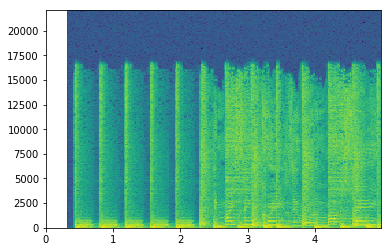

In [8]:
audio_binary = tf.read_file('1.mp3')

samples = 44100
length = 5

waveform = tf.contrib.ffmpeg.decode_audio(audio_binary, channel_count=1,file_format='mp3', samples_per_second=samples)
init_op = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init_op) 
    wave = (sess.run(waveform))
    
dt = 1/samples
t = np.arange(0.0, length, dt)
x = wave.reshape(-1)[0:length*samples]

plt.specgram(x, NFFT=1024, Fs=samples)
plt.show()

<h2>8. Feladat - Hisztogram</h2>

In [9]:
r = requests.get("http://www.snopes.com/facebook-ai-developed-own-language/")
b = r.content.decode("utf-8") 
a = re.findall('<p>.*?</p>', b) #vegyuk az osszes paragrafust
a = list(map(lambda a: a.replace('<p>','').replace('</p>',''),a))
a = "".join(a[0:23]) #cikk vege, tobbi nem kell
a = re.sub('<.*?>',"",a) #<a> tag-ek nem kellenek
a = "".join(a)
a = re.sub('&.*?;','',a) #html encodolt karakterek nem kellenek
print((a))
a = a.lower() #legyen csupa kisbetus
a = ''.join(filter(str.isalpha, a)) #csak a betuk kellenek

It is probably not a coincidence that two of the top-trending news stories of July 2017 were, in the first case, a warning from billionaire tech entrepreneur Elon Musk that artificial intelligence (AI) poses an existential threat to human civilization, and, in the second case, the announcement that an AI experiment sponsored by Facebook was, according to some sources, shut down after researchers discovered that the chatbots they programmed had begun communicating with one another in a private language of their own invention.Musk, who has previously warned that the development of autonomous weaponrycould lead to an AI arms race,told the National Governors Association on 15 July 2017 that the risks posed by artificial intelligence are so great that it needs to be proactively regulated before its too late.Once there is awareness, Musk said, people will be extremely afraid, as they should be.Whether he meant it to or not, in some peoples minds Musks warning conjured up images of Skynet, th

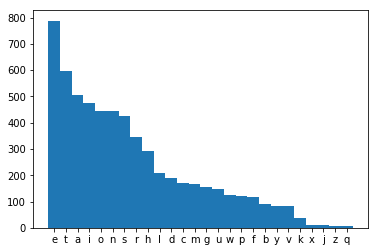

In [10]:
df = pd.DataFrame(list(a),columns=['col1'])
bb = df.groupby(['col1'])

cc = bb.size().reset_index(name='count')

dd = cc.sort_values('count', ascending=False)
ee = np.array(dd[['count']])
ff = np.array(dd[['col1']]).reshape(-1)

plt.figure()
indexes = np.arange(len(ee))
plt.bar(indexes,ee,1)
plt.xticks(indexes , ff) #feliratok
plt.show()